# Machine Learning Project 1

# Customer Churn Analysis and Prediction


## Introduction and Project Goals

In this project, we will explore classification using the Logistic Regression and other Classification Models . We will use a customer churn dataset from the telecom industry, which includes customer data such as monthly revenue, types of offerings, and other services purchased by customers. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some Exploratory data analysis first to ge the idead of the data before getting our hands on some machine learning models. Then we will use different classificaiton models to predict customer churn rates


### Import Data and Librarires

Lets start by importing our dataset and some neccasary Librarires for Exploratory Data Analysis and Machine Learning

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

!pip install ipython-sql
import sqlite3
!pip install tqdm seaborn skillsnetwork pandas numpy scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

URL = r"C:\Users\Hamza Sami\Desktop\boston crime dataset sql\churn.csv"

data = pd.read_csv(URL)


In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
# No of rows and columns in our dataset
data.shape

(7043, 21)

In [135]:
#lets look at our columns

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning and Feature Extraction

Lets look if our data has any null/duplicate values, or even outliers
wchich may result in incorrecet analysis and model bulding

In [4]:
#Check datatypes of features
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [136]:
#check for duplicate rows

duplicated_rows = data[data.duplicated(['customerID'], keep=False)]


In [6]:
# Check for null values

data.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [137]:
# Drop the custoemr id column as it dosent have any relation with cusomter churn
data.drop(columns='customerID', inplace=True)


In [138]:
# Percentage of each unique valuen in featues

for column in data.columns:
    print(column)
    print (data[column].value_counts(normalize=True) * 100)
    

gender
Male      50.47565
Female    49.52435
Name: gender, dtype: float64
SeniorCitizen
0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64
Partner
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
Dependents
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
tenure
1     8.703677
72    5.139855
2     3.379242
3     2.839699
4     2.498935
        ...   
28    0.809314
39    0.795116
44    0.724123
36    0.709925
0     0.156183
Name: tenure, Length: 73, dtype: float64
PhoneService
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity

In [2]:
import numpy as np

# Replace empty strings with NaN values in total charges column
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data.dropna(subset=['TotalCharges'], inplace=True)

data['TotalCharges'] = data['TotalCharges'].astype(float)

# Verify the revised number of values after removing empty values



Text(0.5, 1.0, 'median number of procedures of MontylyCharges')

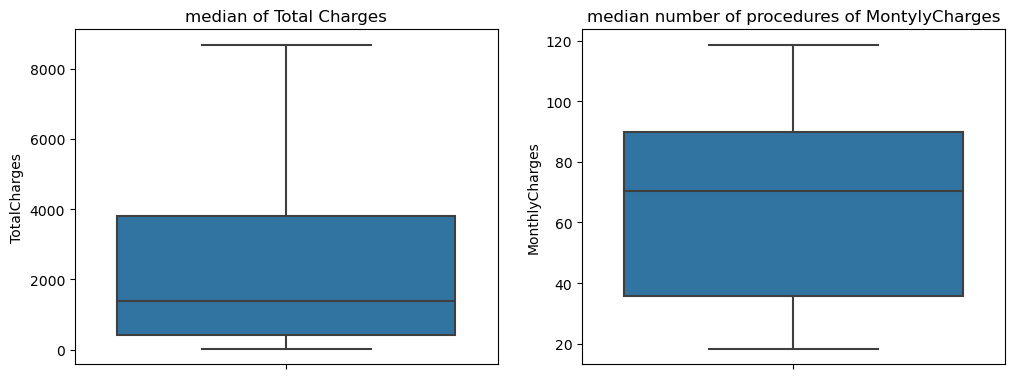

In [6]:
import seaborn as sns

#boxplot for visualizing distribution and potential outliers in total and monthly charges

plt.figure(figsize=(12, 20))

plt.subplot(4,2,1)
sns.boxplot(y='TotalCharges', data=data)
plt.title('median of Total Charges')

plt.subplot(4,2,2)
sns.boxplot(y='MonthlyCharges', data=data)
plt.title('median number of procedures of MontylyCharges')

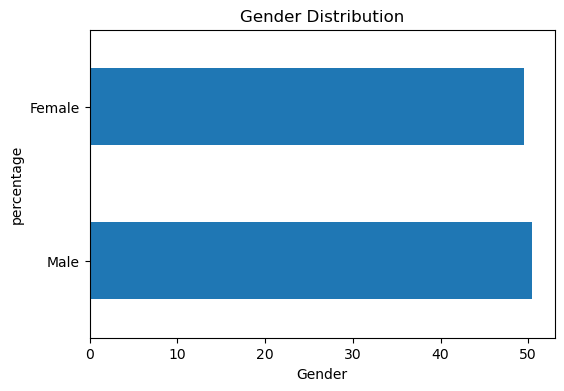

In [142]:

# Count the frequency of each gender as percentage
plt.figure(figsize=(6, 4))
gender_counts = data['gender'].value_counts(normalize=True)*100

gender_counts.plot(kind='barh')

plt.xlabel('Gender')
plt.ylabel('percentage')
plt.title('Gender Distribution')


plt.show()


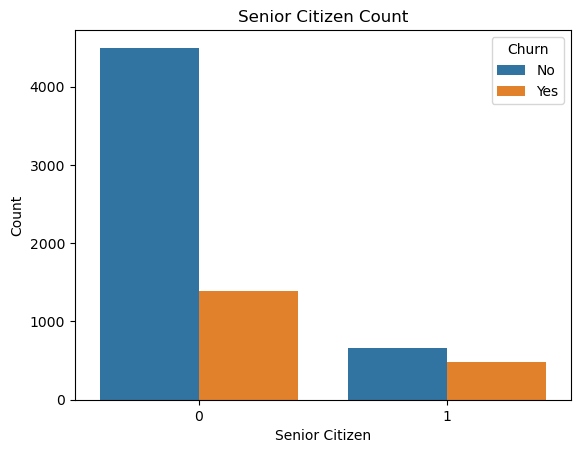

In [143]:

#count of senior citizens and no senior citizens (churn vs non churn)
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')

plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Senior Citizen Count')

plt.show()


In [63]:
partner.head()

,Partner,Total,Churned,perc
0,No,3639,1200,32.976092
1,Yes,3393,669,19.717065


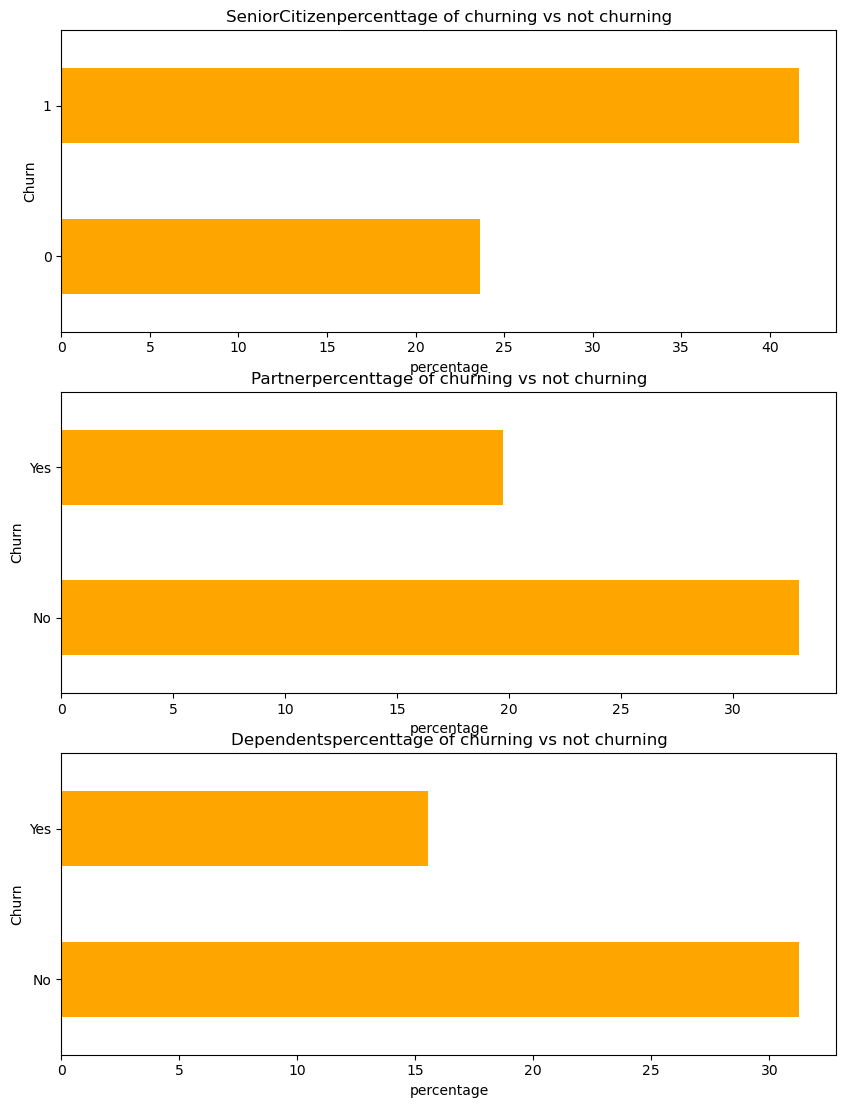

In [26]:
list1=['SeniorCitizen','Partner','Dependents']
plt.figure(figsize=(10,18))
for i, column in enumerate(list1,1):
    plt.subplot(4,1,i)
    c1=data.groupby(column)['Churn'].size()
    c2 = data[data['Churn'] == 'Yes'].groupby(column).size()
    c3=c2/c1 * 100
    c3.plot(kind='barh',color='orange')
    plt.title(column + ''+'percenttage of churning vs not churning')
    plt.ylabel('Churn')
    plt.xlabel('percentage')

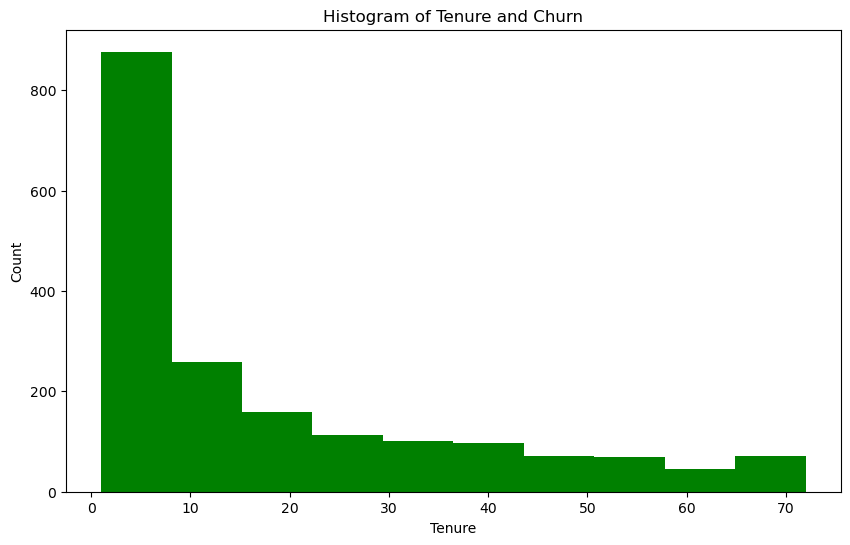

In [27]:
df_tenure = data[data['Churn'] == 'Yes']['tenure']

df_tenure.plot(kind='hist', figsize=(10, 6),bins=10,color='green')

plt.title('Histogram of Tenure and Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.show()


Text(0.5, 1.0, 'Churned')

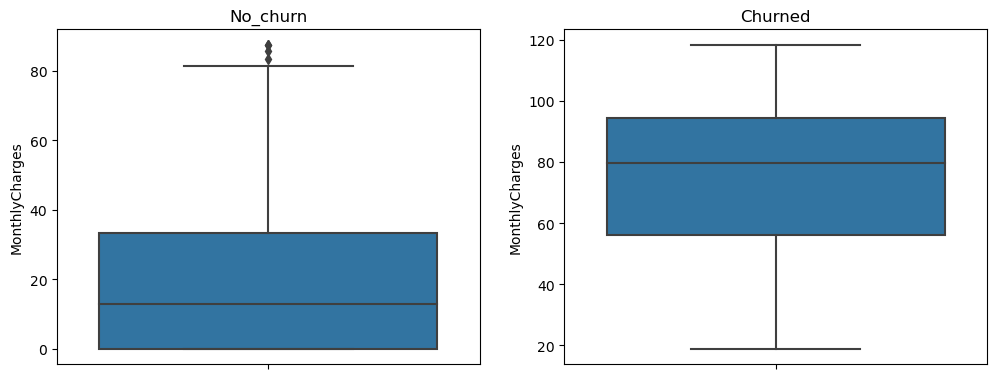

In [257]:

#Median value in box plot for chunr vs not churn(Monthly Charges)

Total_churn_box = data3[data3['Churn'] == 'Yes'][['MonthlyCharges']]
No_churn=data[data3['Churn']=='No'][['MonthlyCharges']]
avg_churn = data3.groupby('Churn')['MonthlyCharges'].mean().to_frame().reset_index()

plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
sns.boxplot(y='MonthlyCharges', data=No_churn)
plt.title('No_churn')

plt.subplot(4, 2, 2)
sns.boxplot(y='MonthlyCharges', data=Total_churn_box)
plt.title('Churned')




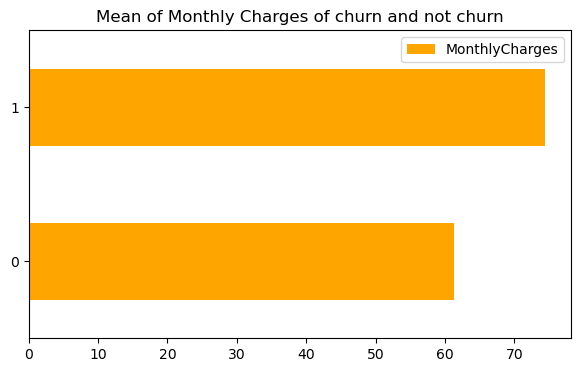

In [208]:
# Mean value of Churn vs not churn for monthly charges

avg_churn.plot(kind='barh',figsize=(7,4),color='orange')
plt.title('Mean of Monthly Charges of churn and not churn')
plt.xlabel=('Churn?')
plt.ylabel=('Percentage')
plt.show()



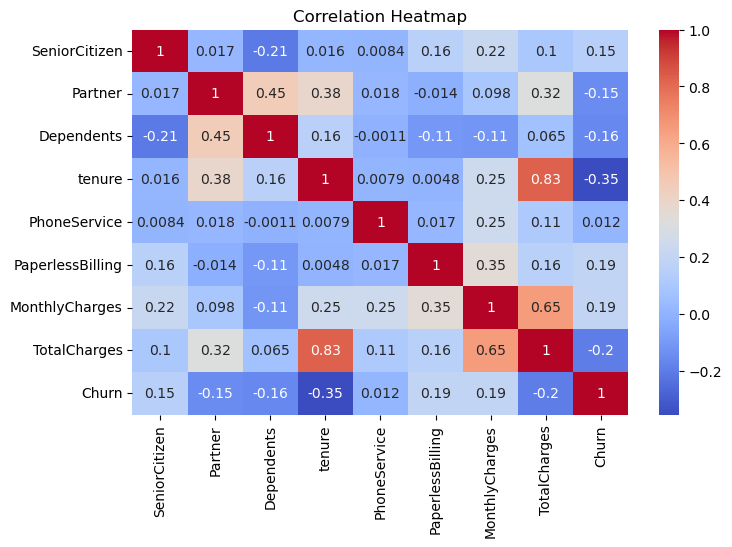

In [220]:

data_corr=data.corr()
# heatmap for visualizing corealtion with features and target variable
plt.figure(figsize=(8, 5)) 
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [258]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Feature Engineering and Label Encoding 

Many features are still in object data type and contain string values. They will be needed to be converted to integer values, so that they can be processed by the machine learning algorithms

In [209]:
# creating a copy of orignal dataframe, so we can recover it later incase of any problems in feature engineering end encoding
data3=data.copy()

In [263]:
#for all features replace 0,1 for yes or no values in orignal columns(including target label)

for column in data.columns:
    data[column]=data[column].replace(['Yes','No'],[1,0])

In [260]:
#adding all columns exccept target into list 1
list1= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [264]:
#distribution of our target column after encoding into 0 and 1 (not churn vs churn)
data3.Churn.value_counts(normalize=True)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Our target variable contains 25% values that are churned. Lets look what percentage of values in each feature are contributing most (in percentage wise) towards people who are churning

In [267]:
results=[]

for column in list1:
    r1=data.groupby(column)['Churn'].count().reset_index().rename(columns={'Churn':'Total'})
    r2=data[data['Churn']==1].groupby(column).count().reset_index().rename(columns={'Churn':'Churned'})
    result=pd.merge(r1,r2, on=column)
    result['percentage_churned']=result['Churned']/result['Total'] * 100
    results.append(result)
    
    

Now we can see some values (in each column) have greater percentages of churning vs others(for eg like senior citizen). So this means if anyone is senior citizen it is '' likey he/she may churned as compared to no senior citizen who is '' likely to be churned
This shows we can label encode such columns as they contain meaningfull analysis, and doing with their percentage invoolvment in churning would help the model to get the meaninful inromation as who is more likely to churn

In [276]:
results = []

for column in list1:
    r1 = data.groupby(column)['Churn'].count().reset_index().rename(columns={'Churn': 'total'})
    r2 = data[data['Churn'] == 1].groupby(column)['Churn'].count().reset_index().rename(columns={'Churn': 'filtered'})
    result = pd.merge(r1, r2, on=column)
    result['percentage'] = (result['filtered'] / result['total']) * 100
    result.sort_values('percentage', ascending=False, inplace=True)

    # Replace the original column values with the percentage values
    data[column] = data[column].map(result.set_index(column)['percentage'])

    results.append(result)

# Print the modified DataFrame
print(data)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        NaN            NaN      NaN         NaN     NaN           NaN   
1        NaN            NaN      NaN         NaN     NaN           NaN   
2        NaN            NaN      NaN         NaN     NaN           NaN   
3        NaN            NaN      NaN         NaN     NaN           NaN   
4        NaN            NaN      NaN         NaN     NaN           NaN   
...      ...            ...      ...         ...     ...           ...   
7038     NaN            NaN      NaN         NaN     NaN           NaN   
7039     NaN            NaN      NaN         NaN     NaN           NaN   
7040     NaN            NaN      NaN         NaN     NaN           NaN   
7041     NaN            NaN      NaN         NaN     NaN           NaN   
7042     NaN            NaN      NaN         NaN     NaN           NaN   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               NaN              NaN     

In [277]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,26.959518,23.650255,19.717065,31.27914,61.990212,25.000000,25.000000,18.998344,41.778667,21.567010,39.140271,41.647465,33.535066,33.728875,42.709677,33.589251,45.285412,50.000000,0.0,0
1,26.204565,23.650255,32.976092,31.27914,18.461538,26.747481,25.081241,18.998344,14.640199,39.941691,22.539289,41.647465,33.535066,33.728875,11.277174,16.375698,19.201995,0.000000,0.0,0
2,26.204565,23.650255,32.976092,31.27914,51.680672,26.747481,25.081241,18.998344,14.640199,21.567010,39.140271,41.647465,33.535066,33.728875,42.709677,33.589251,19.201995,50.000000,100.0,1
3,26.204565,23.650255,32.976092,31.27914,9.836066,25.000000,25.000000,18.998344,14.640199,39.941691,22.539289,15.196078,33.535066,33.728875,11.277174,16.375698,16.731518,0.000000,0.0,0
4,26.959518,23.650255,32.976092,31.27914,51.680672,26.747481,25.081241,41.892765,41.778667,39.941691,39.140271,41.647465,33.535066,33.728875,42.709677,33.589251,45.285412,33.333333,100.0,1


In [244]:
#Fill null value with 0 which may have been caused by mapping
data.fillna(0, inplace=True)


In [243]:
data['TotalCharges'] = data['TotalCharges'].astype(float)


In [247]:
data.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Model Development

Now we can create our different machine learning models, and can check and compare their accuracies for predicting customer churn

In [282]:
#Creating x and y for features and target label to use as inpiut and testing for ml models

x=data.iloc[:,:-1] #all features except target label
y=data.iloc[:,-1:] # only target label

x.shape

(7032, 19)

In [251]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply MinMaxScaler to x to scale values on a similar scale to avoid some features over effecting the model
min_max_scaler = MinMaxScaler()
x2= min_max_scaler.fit_transform(x)

# Apply StandardScaler
standard_scaler = StandardScaler()
x3 = standard_scaler.fit_transform(x)

In [252]:
from sklearn.model_selection import train_test_split

# Perform train-test split for training and test datasets
# stratify is to make sure we divide y in same ration as it was in original dataframe
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=123, stratify=y)


In [291]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


#Creating 3 linear models with diff hperparameters to check accuracy and classifaction report using loop
lr1 = LogisticRegression(solver='liblinear')
lr2 = LogisticRegressionCV(Cs=10, cv=4, solver='liblinear', penalty='l1')
lr3 = LogisticRegressionCV(Cs=10, cv=4, solver='liblinear', penalty='l2')

# Creating a list of linear models
labels = ['lr1', 'lr2', 'lr3']
models = [lr1, lr2, lr3]
results = []

for lab, mod in zip(labels, models): # loop for iterating over each linear model to calculate accuracy and classification report
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results.append((lab, accuracy, report))

for lab, acc, rep in results: # loop for printing the results 
    print('Model:', lab)
    print('Accuracy:', acc)
    print('Classification Report:')
    print(rep)
    print()


Model: lr1
Accuracy: 0.9838862559241706
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1549
           1       0.98      0.96      0.97       561

    accuracy                           0.98      2110
   macro avg       0.98      0.98      0.98      2110
weighted avg       0.98      0.98      0.98      2110


Model: lr2
Accuracy: 0.9829383886255925
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1549
           1       0.97      0.96      0.97       561

    accuracy                           0.98      2110
   macro avg       0.98      0.98      0.98      2110
weighted avg       0.98      0.98      0.98      2110


Model: lr3
Accuracy: 0.9834123222748815
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1549
           1       0.98      0.96      0.97   

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 15))

for i, mod in enumerate(models, 1):
    plt.subplot(4, 2, i)
    mod.fit(x_train, y_train)  # Use "fit" instead of "train" for model training
    y_pred = mod.predict(x_test)
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()

plt.show()  


In [309]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)


rf.fit(x_train, y_train)


y_pred_rf = rf.predict(x_test)


report_rf = classification_report(y_test, y_pred_rf)


print("Classification Report (Random Forest):\n", report_rf)


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1549
           1       0.97      0.96      0.96       561

    accuracy                           0.98      2110
   macro avg       0.98      0.97      0.98      2110
weighted avg       0.98      0.98      0.98      2110



In [306]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Usin svm for training
svm = SVC()


svm.fit(x_train, y_train)


y_pred = svm.predict(x_test)


report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1549
           1       0.97      0.96      0.97       561

    accuracy                           0.98      2110
   macro avg       0.98      0.98      0.98      2110
weighted avg       0.98      0.98      0.98      2110



In [316]:
# Comparison of accuracy scores of logistic , random forest and svm
label2=['Logistic','RandomForest','Svm']
models2=[lr1,rf,svm]
final_result=[]


for lab, mod in zip(label2,models2):
    mod.fit(x_train,y_train)
    y_pred= mod.predict(x_test)
    accuracy=accuracy_score(y_pred, y_test)
    final_result.append((lab,accuracy))

In [320]:
#Converting it into a dataframe

df = pd.DataFrame(final_result)
df.rename(columns={0: 'Model', 1: 'Accuracy'}, inplace=True)
df.set_index('Model', inplace=True)
df.head()

,Accuracy
Model,
Logistic,0.983886
RandomForest,0.981517
Svm,0.983412


## Conclusion

Overall, these models got relatively good accuracy level with each getting atleast 98% accuracy with good classifcation reports too. Theerfore these models can be a good fit for predicting customer churn and reain more customers in future